<a href="https://colab.research.google.com/github/spdr-lily/Data-Science-Profile/blob/main/analise_series_temporais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Estudo de Caso:
Ajudar uma empresa fictícia a prever suas vendas futuras utilizando dados históricos de vendas mensais.

In [ ]:
# importando bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# configurando colab para exibir gráficos
%matplotlib inline

In [ ]:
# gerando dados fictícios
# criando uma série temporal de 24 meses d=com vendas variando entre 80 a 120 mil unidades
dates = pd.date_range('2023-01-01', periods=24, freq='M')
sales = np.random.randint(80000, 120000, size=24)

<ipython-input-3-c302ade6083f>:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range('2023-01-01', periods=24, freq='M')


In [ ]:
# criando um dataframe com os dados
df = pd.DataFrame({'Data': dates, 'Vendas': sales})

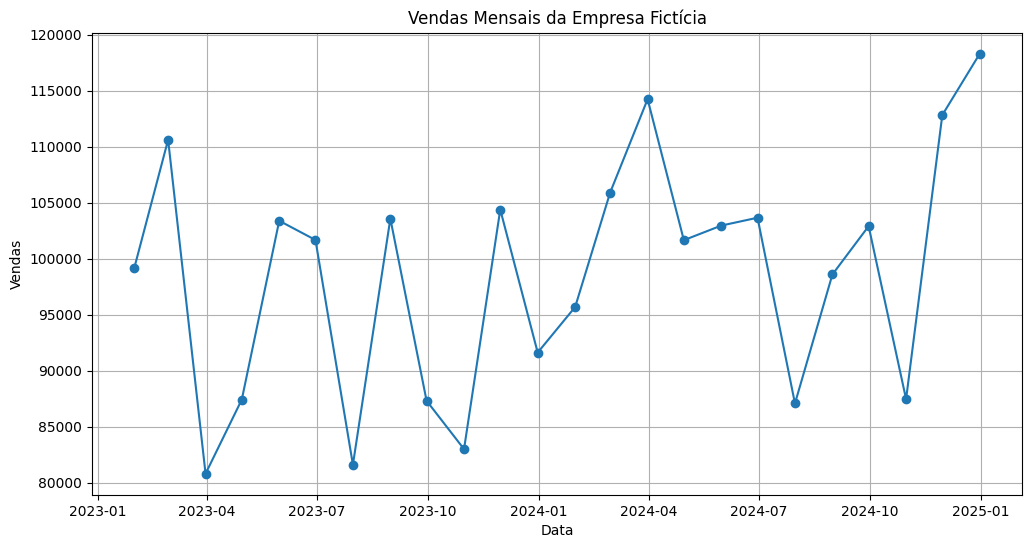

In [ ]:
# configuração inicial e plotagem
plt.figure(figsize=(12, 6))
plt.plot(df['Data'], df['Vendas'], marker='o', linestyle='-')
plt.title('Vendas Mensais da Empresa Fictícia')
plt.xlabel('Data')
plt.ylabel('Vendas')
plt.grid(True)

In [ ]:
# aplicando uma média móvel para suavizar a série temporal
df['Media_Movel'] = df['Vendas'].rolling(window=3).mean()

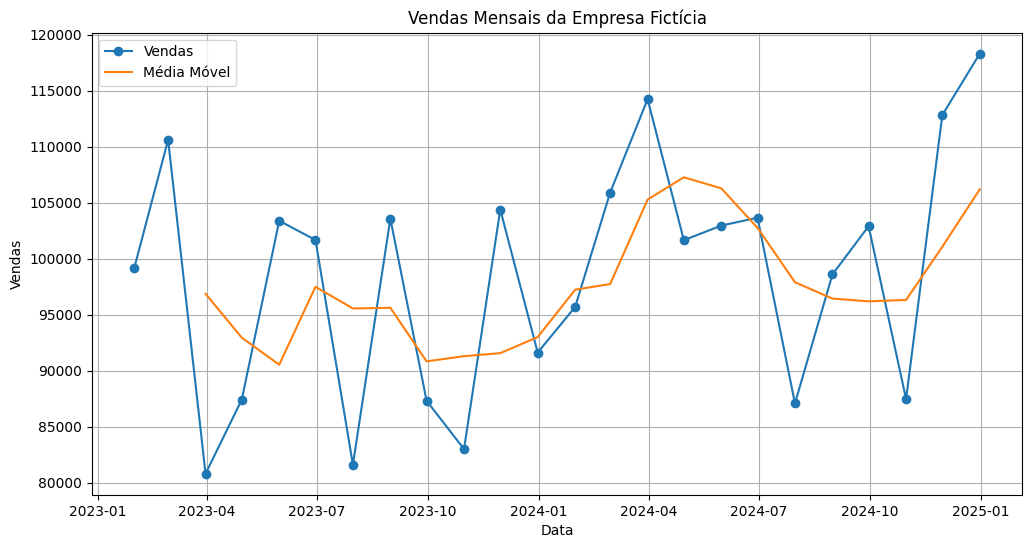

In [ ]:
# plotando a série temporal original e a suavizada
plt.figure(figsize=(12, 6))
plt.plot(df['Data'], df['Vendas'], marker='o', linestyle='-', label='Vendas')
plt.plot(df['Data'], df['Media_Movel'], marker='', linestyle='-', label='Média Móvel')
plt.title('Vendas Mensais da Empresa Fictícia')
plt.xlabel('Data')
plt.ylabel('Vendas')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
# decompondo a série temporal com Statsmodels
from statsmodels.tsa.seasonal import seasonal_decompose

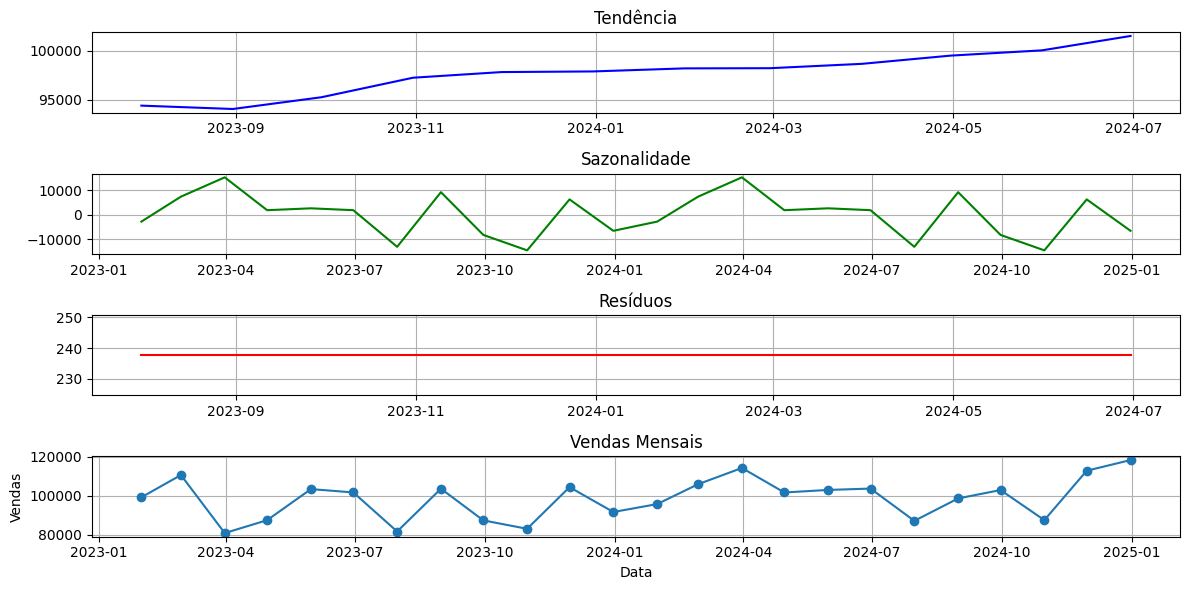

In [24]:
# Visualizando as componentes da decomposição tendência, sazonalidade e resíduos
plt.figure(figsize=(12, 6))

# decomposição tendência
decomposition = seasonal_decompose(df['Vendas'], model='additive', period=12)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(4, 1, 1)
plt.plot(df['Data'], trend, color='blue')
plt.title('Tendência')
plt.grid(True)

plt.subplot(4, 1, 2)
plt.plot(df['Data'], seasonal, color='green')
plt.title('Sazonalidade')
plt.grid(True)

plt.subplot(4, 1, 3)
plt.plot(df['Data'], residual, color='red')
plt.title('Resíduos')
plt.grid(True)

plt.subplot(4, 1, 4)
plt.plot(df['Data'], df['Vendas'], marker='o', linestyle='-', label='Vendas')
plt.title('Vendas Mensais')
plt.xlabel('Data')
plt.ylabel('Vendas')
plt.grid(True)

plt.tight_layout()
plt.show()